Kの伝達関数 K = <TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


100 s + 0.1
-----------
     s

感度関数S(s)のゲイン線図


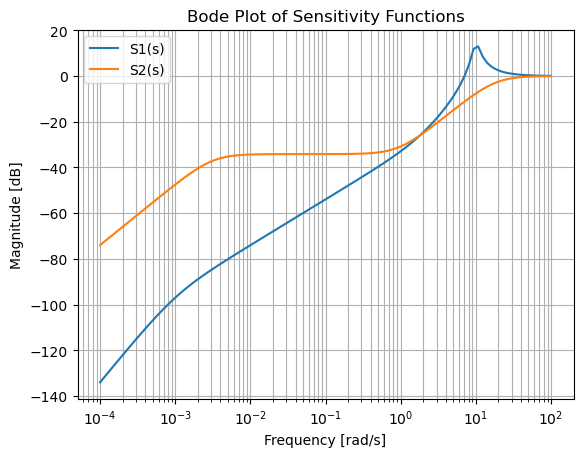

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from control import matlab
from scipy.signal import TransferFunction, bode

# システムの伝達関数
P1_num = [1]
P1_den = [1, 2, 0]
P2_num = [1]
P2_den = [1, 2]

# PI補償器のパラメータ
kp = 100
ki = 0.1

# PI補償器の伝達関数
K_num = [kp, ki]
K_den = [1, 0]
K = matlab.tf(K_num,K_den)
print("Kの伝達関数","K =", K)  # Kを出力


# 畳み込みを用いてループ伝達関数の計算
L1_num = np.convolve(P1_num, K_num)
L1_den = np.convolve(P1_den, K_den)
L2_num = np.convolve(P2_num, K_num)
L2_den = np.convolve(P2_den, K_den)

# 感度関数 S(s) の計算
S1_num = L1_den
S1_den = np.polyadd(L1_num, L1_den)
S2_num = L2_den
S2_den = np.polyadd(L2_num, L2_den)

# TransferFunctionオブジェクトの作成
S1 = TransferFunction(S1_num, S1_den)
S2 = TransferFunction(S2_num, S2_den)

# Bodeプロットの描画
w, mag1, phase1 = bode(S1)
_, mag2, phase2 = bode(S2)


print("感度関数S(s)のゲイン線図")
plt.figure()
plt.semilogx(w, mag1, label='S1(s)')
plt.semilogx(w, mag2, label='S2(s)')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Plot of Sensitivity Functions')
plt.legend()
plt.grid(which='both', axis='both')
plt.show()
